In [56]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
import seaborn as sns

In [57]:
df=pd.read_csv("stock_train.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-03-04,21.520000,21.610001,21.320000,21.389999,21.389999,103900
1,2019-03-05,21.410000,21.650000,21.280001,21.549999,21.549999,110900
2,2019-03-06,21.480000,21.480000,20.660000,20.780001,20.780001,94700
3,2019-03-07,20.809999,20.809999,20.340000,20.570000,20.570000,95800
4,2019-03-08,20.410000,21.100000,20.410000,20.990000,20.990000,138000


In [58]:
df['Date'] = pd.to_datetime(df['Date'], yearfirst=True)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 7 columns):
Date         23 non-null datetime64[ns]
Open         23 non-null float64
High         23 non-null float64
Low          23 non-null float64
Close        23 non-null float64
Adj Close    23 non-null float64
Volume       23 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 1.3 KB


In [60]:
["Volume","Adj Close","Close","Date","Open","High","Low"]

TypeError: 'Index' object is not callable

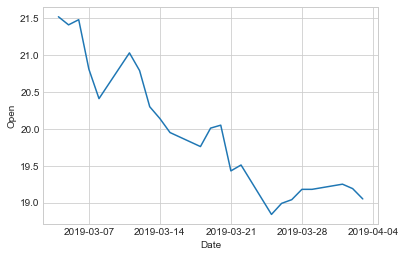

In [33]:
sns.lineplot(x='Date', y='Open', data=df)

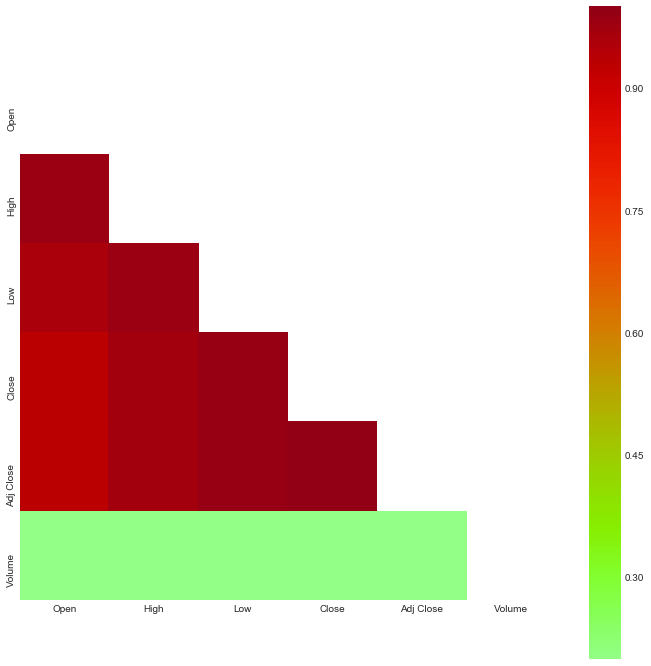

In [35]:

def map_correlation(df):
  corrmatrix = df.corr(method='pearson')
  mask = np.zeros_like(corrmatrix, dtype=np.bool)
  mask[np.triu_indices_from(mask)] = True
  f, ax = plt.subplots(figsize=(12,12))
  cmap = sns.cubehelix_palette(start=0.6, hue=3.7, rot=0.5, as_cmap=True)
  sns.heatmap(corrmatrix, mask=mask, cmap=cmap, vmin=0.2, square=True, ax=ax)
  return corrmatrix
corrmatrix = map_correlation(df)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BEA5ADAFD0>,
      dtype=object)

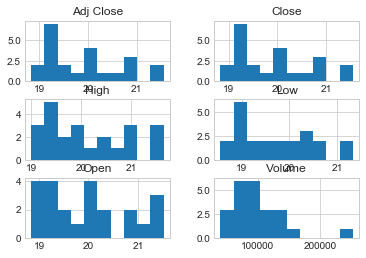

In [40]:
df.hist(bins=10)

In [73]:
cols_drop=["Volume","Adj Close","Close","Date","Open","High","Low"]
x_train = df.drop(cols_drop, axis=1)
x_train['day'] = x_train.index

y_train = df['Open']

(x_train.shape, y_train.shape)

((23, 1), (23,))

In [74]:
from sklearn import linear_model
from sklearn.metrics import r2_score, make_scorer, mean_squared_error, mean_absolute_error, accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

model = linear_model.LinearRegression()
model.fit(x_train, y_train)

train_pred = model.predict(x_train)

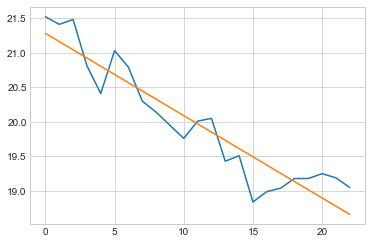

In [78]:
plt.plot(df.Open)
plt.plot(train_pred)

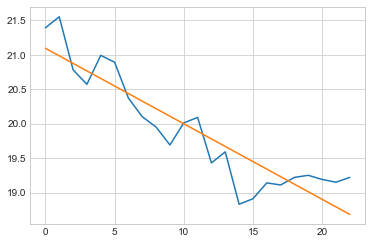

In [79]:
y_train_close = df['Close']
model.fit(x_train, y_train_close)

train_pred_close = model.predict(x_train)
plt.plot(df.Close)
plt.plot(train_pred_close)